In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import kwant

from scipy.constants import physical_constants

In [2]:
h_bar = physical_constants['Planck constant over 2 pi'][0]
m_el = physical_constants['electron mass'][0]
eV_unit = physical_constants['electron volt'][0]

In [3]:
a = 1.0 * 10 ** (-9)
a_nm = a * 10**(9)
N = 49
L = (N + 1) * a

t_J = (h_bar ** 2)/(2 * m_el * a * a)
t = t_J / eV_unit

print("t = ", t)
print("L = ", L)

t =  0.03809981988649954
L =  5.0000000000000004e-08


In [4]:
sys = kwant.Builder()
lat = kwant.lattice.square(a_nm)

In [5]:
def onsite(site):
    (x, y) = site.pos
    return 4*t

def shape_sq(pos):
    x,y = pos
    if(-N/2 < x < N/2 and -N/2 < y < N/2):
        return True
    else:
        return False
        
def shape_circle(pos):
    x, y = pos
    if(x**2 + y**2 < N**2):
        return True
    else:
        return False
        
sys[lat.shape(shape_circle, (0,0))] = onsite
sys[lat.neighbors()] = -t

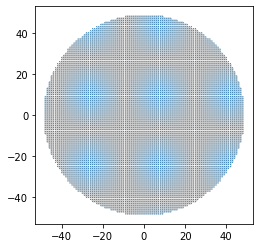

In [6]:
kwant.plot(sys);

In [7]:
sysf = sys.finalized()

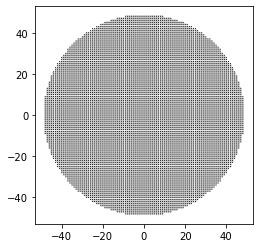

In [8]:
kwant.plot(sysf, site_color = lambda site: sysf.hamiltonian(site, site), colorbar = False);

In [9]:
ham = sysf.hamiltonian_submatrix()

In [10]:
print(ham)

[[ 0.15239928+0.j -0.03809982-0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.03809982+0.j  0.15239928+0.j -0.03809982-0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.03809982+0.j  0.15239928+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 ...
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.15239928+0.j
  -0.03809982-0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ... -0.03809982+0.j
   0.15239928+0.j -0.03809982-0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
  -0.03809982+0.j  0.15239928+0.j]]


In [11]:
ene, v = np.linalg.eigh(ham)

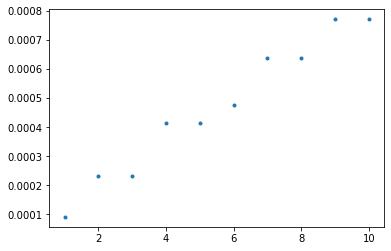

In [12]:
ntab  = np.arange(1, N  + 1)
plt.plot(ntab[:10], ene[:10], ".");

In [13]:
from ipywidgets import interact

In [14]:
def plot_wf(i = 1):
    xtab = np.arange(1, len(v[:, i-1]) + 1)
    print("E = ", ene[i-1])
    kwant.plotter.map(sysf, abs(v[:,i-1])**2)
    plt.plot(xtab, abs(v[:,i-1]) ** 2, ".");

In [15]:
interact(plot_wf, i=(1,10))

interactive(children=(IntSlider(value=1, description='i', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_wf(i=1)>